In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


`Below I'm combining the reference of each data set so that the research paper are easily found. The second dataset needed  especial reformatting so that the columns is the combined datasets can match. After that both of the references are combined`

In [2]:
p1 = "/Users/jenifervivar/Desktop/2269-1_ECL_2269_Elemental_BulkSample_SupplementaryDatasetS1.xlsx"
reference1 = pd.read_excel(p1, sheet_name = "5 Reference List")
reference1.rename(columns={"Reference List":"REFERENCE #","Unnamed: 1":"scientific_paper"}, inplace = True)

reference1.dropna(inplace = True)
reference1["REFERENCE #"] = reference1["REFERENCE #"].str.replace("[", "")
reference1["REFERENCE #"] = reference1["REFERENCE #"].str.replace("]", "")
#reference1["REFERENCE #"] = reference1["REFERENCE #"].astype(int)
reference1.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenifervivar/Desktop/2269-1_ECL_2269_Elemental_BulkSample_SupplementaryDatasetS1.xlsx'

In [3]:
p2 = "/Users/jenifervivar/Desktop/2270-1_ECL_2270_Elemental_BulkSample_SupplementaryDatasetS2.xlsx"
reference2 = pd.read_excel(p2, sheet_name = "5 Reference List")
cols = reference2[reference2.index ==1].values[0]
reference2.columns= cols
reference2.drop(index = [0,1], inplace = True)
reference2.reset_index(drop=True, inplace =True)
reference2.drop(index = [65, 66, 67, 68, 69, 70, 71, 72], inplace = True)
reference2["REFERENCE #"] = reference2["AUTHOR"].str.split(',').apply(lambda x: x[0])
reference2["REFERENCE #"] = reference2["REFERENCE #"] +", "+ reference2["YEAR"].astype(str)
reference2["scientific_paper"] = reference2["AUTHOR"] +". "+reference2["YEAR"].astype(str) +". " + reference2["TITLE"]+ ". "+reference2["JOURNAL"]
reference2.drop(columns = ["AUTHOR", "YEAR", "TITLE", "JOURNAL"], inplace = True)

reference2.head(-3)


,REFERENCE #,scientific_paper
0,"HAO, 2021","HAO, H; CAMPBELL, I; ARCULUS, R J; PERFIT, M R..."
1,"HARPP, 2020","HARPP, K S; WEIS, D. 2020. INSIGHTS INTO THE O..."
2,"SHIMIZU, 2019","SHIMIZU, K; SAAL, A E; HAURI, E H; PERFIT, M R..."
3,"YIERPAN, 2019","YIERPAN, A; KOENIG, S; LABIDI, J; SCHOENBERG, ..."
4,"REEKIE, 2019","REEKIE, C; JENNER, F E; SMYTHE, D; HAURI, E H;..."
...,...,...
57,"MICHAEL, 1998","MICHAEL, P J; CORNELL, W C. 1998. INFLUENCE OF..."
58,"HEKINIAN, 1995","HEKINIAN, R; BIDEAU, R D; HEBERT, R; NIU, Y. 1..."
59,"SMITH, 1994","SMITH, M C; PERFIT, M R; JONASSON, I R. 1994. ..."
60,"DERUELLE, 1992","DERUELLE, B; DREIBUS, G; JAMBON, A. 1992. IODI..."


In [4]:
stacked_df = pd.concat([reference1, reference2], ignore_index= True)
stacked_df.head()

,REFERENCE #,scientific_paper
0,1007,"[1007] BARLING J., GOLDSTEIN S. L., NICHOLLS I..."
1,10281,"[10281] MORGAN J. K., CLAGUE D. A., BORCHERS D..."
2,10282,"[10282] SAAL A. E., KURZ M. D., HART S. R., BL..."
3,10315,"[10315] LE MASURIER W. E., THOMSON J. W.: V..."
4,10321,"[10321] BROTZU P., LONIS R., MELLUSO L., MORBI..."


In [5]:
stacked_df.to_csv("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/references", index = False)

In [2]:
stacked_df= pd.read_csv("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/references")
stacked_df.head()

,REFERENCE #,scientific_paper
0,1007,"[1007] BARLING J., GOLDSTEIN S. L., NICHOLLS I..."
1,10281,"[10281] MORGAN J. K., CLAGUE D. A., BORCHERS D..."
2,10282,"[10282] SAAL A. E., KURZ M. D., HART S. R., BL..."
3,10315,"[10315] LE MASURIER W. E., THOMSON J. W.: V..."
4,10321,"[10321] BROTZU P., LONIS R., MELLUSO L., MORBI..."


`Loading the data containig the cobined data from the two excel sheets`

In [10]:
p_ = r"/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/combined_datasets"
combined_df = pd.read_csv(p_)
combined_df.head(-1)


,SAMPLE NAME,ANALYZED MATERIAL,REFERENCE #,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,...,Ta,Th,U,Cr,Ni,LATITUDE,LONGITUDE,loc_keywords,Tectonic_Setting,Location
0,s_P-41/2000 [17872] / s_R-41/2000 [17697],whole rock,17872,49.840,0.690,19.520,9.58,0.190,5.830,11.810,...,0.012000,0.080000,0.037000,89.000000,31.800000,43.88000,145.53000,Subaerial (SAE),IAB,"(43.88, 145.53)"
1,s_TOL-12-01 [19963],whole rock,19963,49.684,1.243,16.292,9.88,0.156,5.446,9.331,...,0.306222,1.560400,0.995827,162.629578,55.026173,55.82190,160.23630,Subaerial (SAE),IAB,"(55.8219, 160.2363)"
2,s_TOL-12-02 [19963],whole rock,19963,50.437,1.328,17.051,9.35,0.136,4.771,9.144,...,0.344621,1.751808,1.119837,112.968681,47.489128,55.81992,160.39200,Subaerial (SAE),IAB,"(55.81992, 160.392)"
3,s_TOL-12-03 [19963],whole rock,19963,50.880,1.384,16.976,9.69,0.153,4.588,8.533,...,0.353370,1.869443,1.182308,102.395943,40.964020,55.81042,160.36475,Subaerial (SAE),IAB,"(55.81042, 160.36475)"
4,s_TOL-12-04 [19963],whole rock,19963,50.845,1.913,16.231,10.11,0.154,3.535,7.915,...,0.393347,2.643277,1.661968,28.622011,22.113792,55.81600,160.38636,Subaerial (SAE),IAB,"(55.816, 160.38636)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,POS0379-2-009-016,WHOLE ROCK,"LONG, 2019",47.700,0.760,16.700,9.05,0.150,8.240,12.000,...,0.140000,0.150000,0.360000,434.000000,122.000000,13.87400,-44.61900,POS0379-2,MORB,"(13.874, -44.619)"
6363,POS0379-2-009-020,WHOLE ROCK,"LONG, 2019",40.100,0.130,5.430,14.90,0.200,29.000,4.280,...,0.020000,0.040000,0.020000,516.000000,973.000000,13.87400,-44.61900,POS0379-2,MORB,"(13.874, -44.619)"
6364,MELPHNX-2-45-2,GLASS,"NIU, 2019",51.700,3.570,11.810,16.81,0.310,3.250,7.630,...,0.910000,0.770000,0.300000,1.610000,4.070000,10.53380,-103.36100,MELPHNX-2,MORB,"(10.5338, -103.361)"
6365,MELPHNX-2-52-3,GLASS,"NIU, 2019",51.140,1.510,14.920,9.82,0.180,7.380,11.980,...,0.210000,0.170000,0.070000,281.480000,85.140000,10.50220,-103.48700,MELPHNX-2,MORB,"(10.5022, -103.487)"


`Below I load the data for only the variables of interest. That is, only the chemical values and the target variable`

In [3]:
p = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/variables_target_file"
sampled_df = pd.read_csv(p)
sampled_df.head()

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Lu,Hf,Ta,Th,U,Cr,Ni,LATITUDE,LONGITUDE,Tectonic_setting
0,49.840,0.690,19.520,9.58,0.190,5.830,11.810,1.250,0.030,0.030,...,0.210000,0.610000,0.012000,0.080000,0.037000,89.000000,31.800000,43.88000,145.53000,IAB
1,49.684,1.243,16.292,9.88,0.156,5.446,9.331,2.906,1.368,0.387,...,0.506941,4.048274,0.306222,1.560400,0.995827,162.629578,55.026173,55.82190,160.23630,IAB
2,50.437,1.328,17.051,9.35,0.136,4.771,9.144,3.202,1.524,0.414,...,0.521601,4.423565,0.344621,1.751808,1.119837,112.968681,47.489128,55.81992,160.39200,IAB
3,50.880,1.384,16.976,9.69,0.153,4.588,8.533,3.281,1.786,0.482,...,0.565124,4.716979,0.353370,1.869443,1.182308,102.395943,40.964020,55.81042,160.36475,IAB
4,50.845,1.913,16.231,10.11,0.154,3.535,7.915,3.498,2.180,0.647,...,0.717250,6.677058,0.393347,2.643277,1.661968,28.622011,22.113792,55.81600,160.38636,IAB


In [61]:
sampled_df[sampled_df.index ==3689][["U", "Cr"]]


,U,Cr
3689,26.1,621.0


In [9]:
t = sampled_df.Tectonic_setting.value_counts()
t

IAB     3308
OIB     1989
MORB    1071
Name: Tectonic_setting, dtype: int64

`The data below seems to be imbalance as there are more values of the IAB tectonic setting when compared to MORB. the data has to be balance before any algorithm in run on it to ensure accuracy on future predictions.'

<BarContainer object of 3 artists>

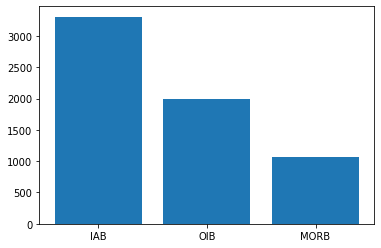

In [10]:
plt.bar(t.index, t.values)

## balance data

`Transform the data to numerical values via the get dummies function. This method is sprefer so that no weigths are added to the data and to make it easy to the algorithm to run.`

In [11]:
y = pd.get_dummies(sampled_df.Tectonic_setting, prefix = "tectonic" )
y

,tectonic_IAB,tectonic_MORB,tectonic_OIB
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
6363,0,1,0
6364,0,1,0
6365,0,1,0
6366,0,1,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


binary_val = label_encoder.fit_transform(sampled_df["Tectonic_setting"])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = binary_val.reshape(len(binary_val), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

# Outliers

`Below Im taking a closer look at the outliers so that the expert could determine if getting rid of them is ok. The function below will ease the taks of detecting the outliers via two methods. The first looks at the statistics of the whole data frame and discriminate on values that are above a determined percentile. The second method assumes the data is normalized, and expects a single value to discriminate on. The value is to be determine by the user.`

In [20]:
def metaData(df, percentile= False, cols = None, metaCols = None, index_val = "", val=20):
    
    if index_val =="":
        index_val = str(percentile).replace("0.","")+ "%"
   
    #gets a dataframe descring the stats of the dataframe
    if percentile:
        stats = df[cols].describe(percentiles = [.25, .50, .75])

        boundary = stats[stats.index == index_val].values

        i = 0
        chem_val = pd.DataFrame()
        outliers_meta = pd.DataFrame()
        for col in df[cols]:
            ref = df[metaCols].loc[df[col].values>=boundary[0][i]]
            #ref.reset_index(drop = True, inplace = True)
            outliers_meta = pd.concat([outliers_meta, ref])
            chem_val[col] = df[col].loc[df[col].values>=boundary[0][i]] #.reset_index(drop = True)
            i+=1
    else:
        i = 0
        tectonic = []
        chem_val = pd.DataFrame()
        outliers_meta = pd.DataFrame()
        for col in df[cols]:
            ref = df[metaCols].loc[df[col].values>= val]
            #ref.reset_index(drop = True, inplace = True)
            outliers_meta = pd.concat([outliers_meta, ref])
            chem_val[col] = df[col].loc[df[col].values>=val]#.reset_index(drop = True)
            tectonic.append(utliers_meta[outliers_meta.columns[1]])
            i+=1 
        chem_val["tectonic_setting"] = tectonic
    return outliers_meta, chem_val

## determining columns of interest only

In [5]:
col = sampled_df.columns[:-3].values
col

array(['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Th', 'U', 'Cr', 'Ni'], dtype=object)

## Birnging all the elements on the same scale for comparinson

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(sampled_df[col])
x_standard

array([[ 1.48027944e-01, -1.10217995e+00,  1.68327786e+00, ...,
        -6.57063449e-01, -5.75901198e-01, -4.52021819e-01],
       [ 1.00739882e-01, -5.14640248e-01,  3.73268772e-01, ...,
         3.07283700e-01, -3.37667487e-01, -3.48165786e-01],
       [ 3.28995718e-01, -4.24331253e-01,  6.81291355e-01, ...,
         4.32007519e-01, -4.98348834e-01, -3.81867746e-01],
       ...,
       [ 5.42095123e-01, -2.30963758e-01, -1.83525674e-01, ...,
        -6.23873456e-01,  4.68814650e-02, -2.13511546e-01],
       [ 3.70372642e+00, -2.73462109e-01, -9.78946311e-01, ...,
        -3.03894200e-04, -8.57978258e-01, -5.75837894e-01],
       [ 3.25206480e+00,  4.52755206e-02, -1.08040303e+00, ...,
        -8.07644828e-02, -8.45586022e-01, -5.53882786e-01]])

## setting the old values to the new values

In [8]:
sampled_df[col] = x_standard
#combined_df[col] = x_standard

`It seems that values above 20 standard deviations from the mean are outliers so I will be selecting values above that number `

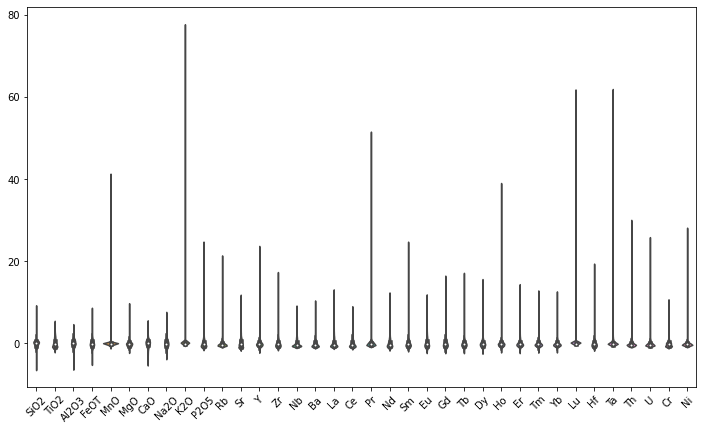

In [9]:
plt.figure(figsize=(12,7))
sns.violinplot(data = sampled_df[col])
plt.xticks(rotation = 45)
plt.show()

In [68]:
p = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/variables_target_file"
sampled_df = pd.read_csv(p)
sampled_df.head()

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Lu,Hf,Ta,Th,U,Cr,Ni,LATITUDE,LONGITUDE,Tectonic_setting
0,49.840,0.690,19.520,9.58,0.190,5.830,11.810,1.250,0.030,0.030,...,0.210000,0.610000,0.012000,0.080000,0.037000,89.000000,31.800000,43.88000,145.53000,IAB
1,49.684,1.243,16.292,9.88,0.156,5.446,9.331,2.906,1.368,0.387,...,0.506941,4.048274,0.306222,1.560400,0.995827,162.629578,55.026173,55.82190,160.23630,IAB
2,50.437,1.328,17.051,9.35,0.136,4.771,9.144,3.202,1.524,0.414,...,0.521601,4.423565,0.344621,1.751808,1.119837,112.968681,47.489128,55.81992,160.39200,IAB
3,50.880,1.384,16.976,9.69,0.153,4.588,8.533,3.281,1.786,0.482,...,0.565124,4.716979,0.353370,1.869443,1.182308,102.395943,40.964020,55.81042,160.36475,IAB
4,50.845,1.913,16.231,10.11,0.154,3.535,7.915,3.498,2.180,0.647,...,0.717250,6.677058,0.393347,2.643277,1.661968,28.622011,22.113792,55.81600,160.38636,IAB


In [12]:
col

array(['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Th', 'U', 'Cr', 'Ni'], dtype=object)

In [21]:
#def metaData(df, percentile= .75, cols = None, metaCols = None, index_val = "", Stats = True, val=20)
cols2 = ["REFERENCE #","Tectonic_Setting", "Location"]
meta3, chem3 = metaData(combined_df, cols =col, metaCols =["REFERENCE #","Tectonic_Setting", "Location"], val= 20)
meta3

,REFERENCE #,Tectonic_Setting,Location
0,17872,IAB,"(43.88, 145.53)"
1,19963,IAB,"(55.8219, 160.2363)"
2,19963,IAB,"(55.81992, 160.392)"
3,19963,IAB,"(55.81042, 160.36475)"
4,19963,IAB,"(55.816, 160.38636)"
...,...,...,...
6360,"LONG, 2019",MORB,"(13.874, -44.619)"
6361,"LONG, 2019",MORB,"(13.874, -44.619)"
6362,"LONG, 2019",MORB,"(13.874, -44.619)"
6363,"LONG, 2019",MORB,"(13.874, -44.619)"


In [22]:
chem3

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Cr,Ni
0,49.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,31.800000
1,49.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.629578,55.026173
2,50.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.968681,47.489128
3,50.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.395943,40.964020
4,50.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.622011,22.113792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,40.100,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516.000000,973.000000
6364,51.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6365,51.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.480000,85.140000
6366,61.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
def outliers_vals(df, outliers_df, cols, save = False, name = ""):
    vals = []
    for i in outliers_df.index.values:
        l = df[cols][df.index == i].values.tolist()[0]
        vals.append(l)
    df1 = pd.DataFrame(data = vals, columns = cols)
    if save:
        df1.to_csv("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/" + name)

In [51]:
std_six= outliers_vals(sampled_df, meta3, col, True, name ="SIX_STD_from_mean")

In [53]:
std_six_unnormalized= outliers_vals(sampled_df, meta3, col, True, name ="SIX_STD_from_mean_un_normalized")

In [58]:
std_ten_norma = outliers_vals(sampled_df, meta3, col, True, name ="ten_std_from_mean_normal")

In [60]:
std_ten_un = outliers_vals(sampled_df, meta3, col, True, name ="ten_std_from_mean_unnormalized")

In [67]:
std_20_normal = outliers_vals(sampled_df, meta3, col, True, name ="20_std_from_mean_normal")

In [69]:
std_20_unnormalized = outliers_vals(sampled_df, meta3, col, True, name ="20_std_from_mean_unnormal")

In [ ]:
vals = []
for i in meta3.index.values:
    t = sampled_df[col][sampled_df.index == i].values.tolist()[0]
    vals.append(t)
df1 = pd.DataFrame(data = vals, columns = col)
df1

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Cr,Ni
0,6.298919,-1.485705,-0.132700,-3.630812,-0.599512,-1.819961,-3.766153,-0.547564,1.324038,-0.882759,...,-0.557744,-0.286231,-0.172960,-0.019371,0.382965,-0.095187,3.773654,1.870405,-0.837982,-0.576330
1,8.381710,-1.772593,-0.843304,-4.606888,-0.844790,-1.974460,-4.736568,1.322653,0.286298,-1.263463,...,1.897269,1.805656,1.983032,0.058220,1.428530,1.061246,7.231808,7.885840,-0.844454,-0.585273
2,8.431287,-1.772113,-0.954794,-4.422915,-0.795804,-1.974421,-4.932051,2.912610,0.049533,-1.263145,...,2.391993,2.573900,2.673757,0.069413,1.366993,1.152959,7.744349,7.762131,-0.844454,-0.594216
3,8.242666,-1.729578,-0.981816,-4.663101,-0.795409,-1.979537,-5.025946,1.678784,1.144544,-1.220831,...,0.907311,0.930988,1.403807,0.035582,0.760958,0.827687,6.799143,6.435873,-0.844454,-0.585273
4,8.357154,-1.750334,-1.006606,-4.903287,-0.844001,-1.971797,-5.025811,0.800150,1.201483,-1.262783,...,0.781655,1.092286,1.221683,0.030523,0.512263,0.903822,6.867217,7.191867,-0.837982,-0.585273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,-0.925047,-1.665283,-4.574572,-0.349972,0.382689,7.442803,-3.662437,-3.134234,-0.260268,-1.135671,...,-1.623146,-1.516752,-1.476800,-0.070783,-1.341490,-0.382275,-0.473743,-0.161225,8.813725,7.968723
560,-0.955360,-1.729031,-4.818068,-1.116524,-0.206108,8.243056,-3.957081,-3.121695,-0.266586,-1.220395,...,-1.806660,-1.716296,-1.639780,-0.076474,-1.405149,-0.382275,-0.624335,-0.110937,6.736489,7.499215
561,-2.558910,-1.782154,-6.055840,-1.070531,-0.304240,8.501203,-0.945714,-3.297235,-0.267218,-1.220395,...,-2.025960,-1.897383,-1.860579,-0.085163,-1.439270,-0.385261,-0.628958,0.229210,4.782204,8.710994
562,-2.025404,-1.782154,-5.118380,0.258158,-0.058909,6.704504,-1.175436,-3.033925,-0.264375,-0.923864,...,-1.623299,-1.505777,-1.459959,-0.070631,-1.430952,-0.383856,-0.613793,0.168362,6.629715,7.396370


In [14]:
meta3.index.values

array([1156, 1178, 1180, 1183, 1194, 1197, 1206, 1208, 1308, 1852, 3180,
       3968, 3969, 5949, 5951, 5953, 6355, 1723, 1724, 3097, 3100, 2136,
       2137, 2138, 2139, 6347,  861, 5611, 5612, 5613, 5614, 5615, 5620,
       5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5635, 5636,
       5706, 5765, 5766, 5767, 5768, 5769, 5770, 5963, 6257, 6258, 6259,
       6260, 2657, 4091, 5776, 3051, 3783, 3784, 4639, 4640, 6347, 6354,
        510,  511,  512,  517, 1194, 1914, 2071, 2203, 2204, 2205, 3319,
       3347, 3448, 3638, 3639, 3689, 5171, 5953,  219,  220,  510,  637,
       1103, 2272, 4100,  875, 1028, 1029, 1031, 1032, 1033, 1308, 1460,
       5717, 5718, 5721, 5723, 5724, 5725, 5738, 5749, 5758, 5992, 5993,
       5994, 6000, 6002, 6015, 6016, 6080, 6081, 6082, 6087, 6093, 6094,
       6096, 6097, 6347, 6364, 6366, 6367,  998,  999, 1000, 1001, 1308,
       1448, 1450, 1451, 2657, 2758, 2759, 3550, 5717, 5721, 5993, 5994,
       6004, 6015, 6016,  913,  915,  919,  925,  9

In [66]:
len(meta3)

21

In [68]:
sampled_df[sampled_df.index == 5776].values

array([[49.53, 0.59, 16.68, 8.22, 0.14, 9.5, 10.86, 2.53, 246.0, 0.16,
        0.21, 111.0, 12.5, 16.5, 0.47, 3.39, 0.637, 2.12, 0.422, 2.57,
        1.12, 0.622, 1.67, 0.318, 2.21, 0.471, 1.35, 0.203, 1.37, 0.205,
        0.597, 0.033, 0.03, 0.011, 386.0, 227.0, -7.5835, -13.4703,
        'MORB']], dtype=object)

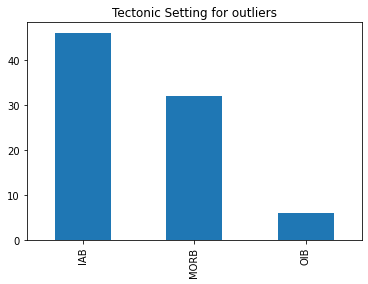

In [67]:
meta3["Tectonic_Setting"].value_counts().plot(kind = "bar")
plt.title("Tectonic Setting for outliers")
plt.show()

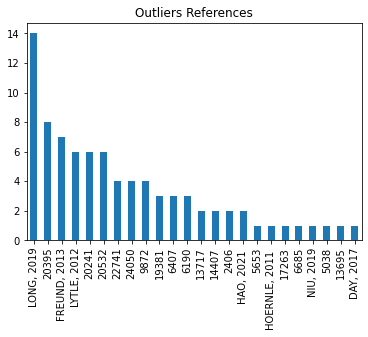

In [66]:
meta3["REFERENCE #"].value_counts().plot(kind = "bar")
plt.title("Outliers References")
plt.show()

In [22]:
stacked_df[stacked_df["REFERENCE #"]=='20395']

,REFERENCE #,scientific_paper


In [23]:
stacked_df[stacked_df["REFERENCE #"]=='24050']

,REFERENCE #,scientific_paper


In [38]:
stacked_df[stacked_df["REFERENCE #"]=='20241']

,REFERENCE #,scientific_paper


In [56]:
stacked_df[stacked_df["REFERENCE #"]=='9872']["scientific_paper"]

424    [9872] TURNER SIMON P., PLATT R. G., GEORGE R....
Name: scientific_paper, dtype: object

In [54]:
sampled_df[sampled_df.index == 3689].values


array([[0.3602179633905455, -0.4115817482604109, -2.626603345250284,
        -2.251019773302468, -0.4514394271381841, 1.988171796164771,
        -2.718575062395924, -2.494766651610532, 1.8784700865498578,
        5.599814720199212, 11.847214955369575, 2.3577644677640093,
        0.585975048613756, 5.516159854495406, 1.6471957582594106,
        10.116885634596239, 4.804805038254181, 6.576450611689134,
        3.764464141681849, 9.82668828003877, 8.201239194140989,
        4.342962441377408, 4.851555097004523, 2.401338384616571,
        1.1314796157273066, 0.425307070047917, -0.06327496051175069,
        0.07959985846155064, -0.05654592975303194, -0.023355310052234457,
        6.866290504783508, 0.728125893677976, 29.755604862417876,
        25.555990559580867, 1.1454224544887097, 2.4866536835926816,
        36.45, -1.27, 'IAB']], dtype=object)

In [55]:
sampled_df[sampled_df.index == 3689].columns

Index(['SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th',
       'U', 'Cr', 'Ni', 'LATITUDE', 'LONGITUDE', 'Tectonic_setting'],
      dtype='object')

In [62]:
#HOERNLE, 2011
stacked_df[stacked_df["REFERENCE #"]=='HOERNLE, 2011']

,REFERENCE #,scientific_paper
457,"HOERNLE, 2011","HOERNLE, K; HAUFF, F; KOKFELT, T F; HAASE, K M..."


In [41]:
#2406
stacked_df[stacked_df["REFERENCE #"]=='2406']

,REFERENCE #,scientific_paper
275,2406,"[2406] DIETRICH V. J., EMMERMANN R., OBERH腘SLI..."


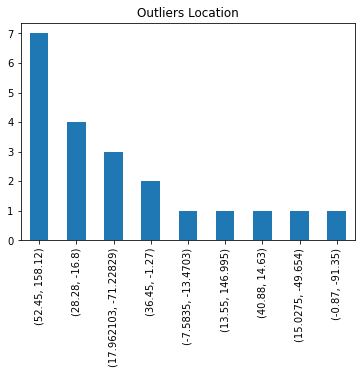

In [27]:
meta3["Location"].value_counts().plot(kind = "bar")
plt.title("Outliers Location")
plt.show()

In [28]:
chem3

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Cr,Ni
0,NaN,NaN,NaN,NaN,39.782969,NaN,NaN,NaN,77.445099,24.450704,...,NaN,NaN,NaN,50.697891,NaN,61.652567,29.755605,25.555991,NaN,25.851222
1,NaN,NaN,NaN,NaN,41.009628,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,61.535826,NaN,33.593872,NaN,NaN,NaN,27.851792
2,NaN,NaN,NaN,NaN,36.004860,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,36.740855,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
chem3.describe().dropna(axis = 1)

,MnO,Pr,Sm,Lu,Ta,Ni
count,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,38.384578,50.460984,22.609913,56.116859,47.623219,26.851507
std,2.395222,1.136669,2.591905,7.663577,19.840494,1.414616
min,36.004860,49.657238,20.777160,50.697891,33.593872,25.851222
25%,36.556856,50.059111,21.693536,53.407375,40.608546,26.351364
50%,38.261912,50.460984,22.609913,56.116859,47.623219,26.851507
75%,40.089634,50.862857,23.526290,58.826342,54.637893,27.351649
max,41.009628,51.264731,24.442667,61.535826,61.652567,27.851792


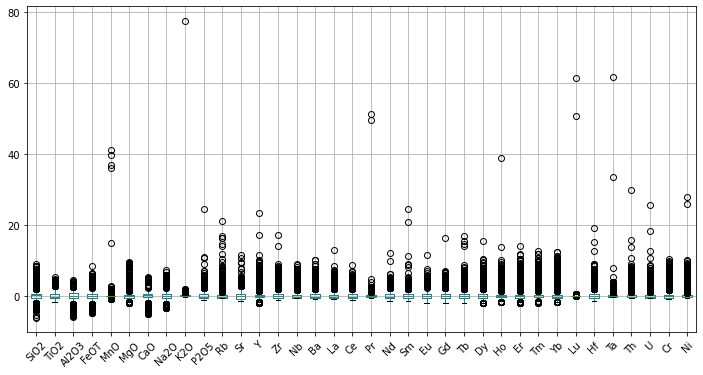

In [30]:
boxplot = sampled_df[col].boxplot(figsize=(12, 6), rot=45) 

`Looking at the max values only`

In [31]:
#def metaData(df, percentile= .75, cols = None, metaCols = None, index_val = None):
meta2, chem2 = metaData(combined_df, percentile = .99,cols = combined_df.columns[3:-5], \
                        metaCols=["REFERENCE #","Tectonic_Setting", "Location"],index_val = "max")
meta2

,REFERENCE #,Tectonic_Setting,Location
1852,23519,IAB,"(53.93247, -168.03113)"
1959,6967,OIB,"(-13.8359, -171.9469)"
1727,6859,IAB,"(54.17, -165.92)"
1723,21047,IAB,"(12.372, -69.14)"
2137,24050,OIB,"(28.28, -16.8)"
5628,"GAO, 2016",MORB,"(-36.506, 52.5582)"
1993,20241,IAB,"(18.021601, -71.139032)"
4091,1501,OIB,"(28.26, -16.74)"
5776,"HOERNLE, 2011",MORB,"(-7.5835, -13.4703)"
3784,2406,IAB,"(13.55, 146.995)"


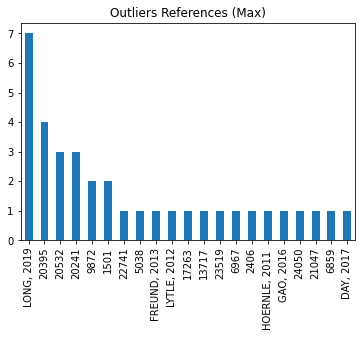

In [32]:
meta2["REFERENCE #"].value_counts().plot(kind = "bar")
plt.title("Outliers References (Max)")
plt.show()

In [33]:
chem2

,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,P2O5,...,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Cr,Ni
0,8.952554,5.155702,4.34956,8.341283,41.009628,9.456344,5.281775,7.335472,77.445099,24.450704,...,14.09026,12.551101,12.329934,61.535826,19.093082,61.652567,29.755605,25.555991,10.399155,27.851792


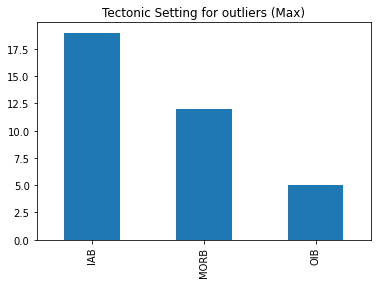

In [34]:
meta2["Tectonic_Setting"].value_counts().plot(kind = "bar")
plt.title("Tectonic Setting for outliers (Max)")
plt.show()

<AxesSubplot:>

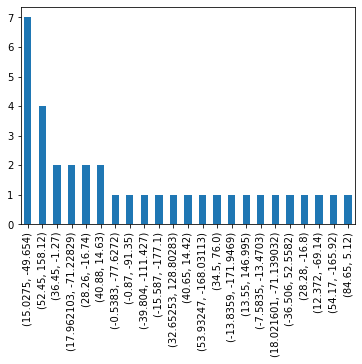

In [35]:
meta2["Location"].value_counts().plot(kind = "bar")